In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import numpy as np
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import sys
sys.path.append('../')
from simulate_frbs import *


In [2]:
directories = [
    "Constant_SNR_simple_broad",
    "Constant_SNR_simple_narrow",
    "Constant_SNR_simulated_scattered",
    "Constant_SNR_complex",
    "Constant_SNR_drifting"
]

data = []

for directory in directories:
    data_dir = f"/Users/dirkkuiper/Documents/MacBookProDocuments/University/Thesis/Rep_Learn_FRB/{directory}"
    data_per_directory = []

    for filename in os.listdir(data_dir):
        if filename.endswith(".npy"):
            data_per_directory.append((np.load(os.path.join(data_dir, filename))))

    data_per_directory = np.array(data_per_directory).reshape(-1, 1024 * 512)[:100]
    data.append(data_per_directory)

# Combine the data from all directories into one array
combined_data = np.concatenate(data, axis=0)

# Reshape the combined data for PCA
combined_data_2d = combined_data.reshape(-1, 1024 * 512)

print(combined_data_2d.shape)


(500, 524288)


In [3]:
print(combined_data_2d.shape)


(500, 524288)


In [4]:
# Apply ica to the combined data
n_components = 2  # You can adjust the number of components as needed
ica = FastICA(n_components=n_components)
fit = ica.fit(combined_data_2d)
transformed_fit = ica.fit_transform(combined_data_2d)



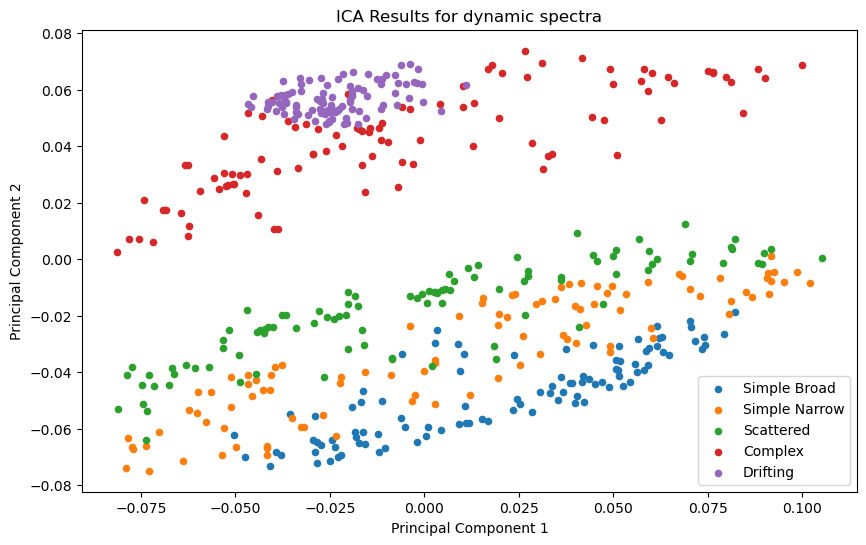

In [5]:
# Define labels for each directory
labels = [
    "Simple Broad",
    "Simple Narrow",
    "Scattered",
    "Complex",
    "Drifting"
]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot where points are colored by directory labels
for i, label in enumerate(directories):
    num_samples = data[i].shape[0]
    start_idx = sum(len(data[j]) for j in range(i))
    end_idx = start_idx + num_samples
    plt.scatter(transformed_fit[start_idx:end_idx, 0], transformed_fit[start_idx:end_idx, 1], label=labels[i], s=20)

# Set axis labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Set a title for the plot
plt.title('ICA Results for dynamic spectra')

# Display a legend to differentiate the datasets
plt.legend()

# Show the plot
plt.show()

In [6]:
# Apply ICA to the combined data
n_components = 3  # You can adjust the number of components as needed
ICA = FastICA(n_components=n_components)
fit = ICA.fit(combined_data_2d)
transformed_fit = ICA.fit_transform(combined_data_2d)


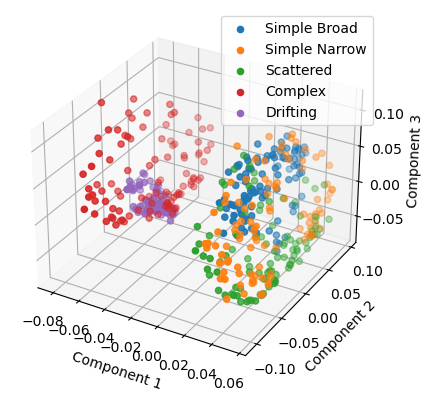

In [7]:
# Separate the transformed data back into classes
ica_per_directory = []
for i in range(len(directories)):
    num_samples = data[i].shape[0]
    start_idx = sum(len(data[j]) for j in range(i))
    end_idx = start_idx + num_samples
    ica_per_directory.append(transformed_fit[start_idx:end_idx, :])

# Create a 3D scatter plot for each class
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

labels = [
    "Simple Broad",
    "Simple Narrow",
    "Scattered",
    "Complex",
    "Drifting"
]


for i, label in enumerate(directories

):
    ax.scatter(ica_per_directory[i][:, 0], ica_per_directory[i][:, 1], ica_per_directory[i][:, 2], label=labels[i])

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.legend()
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


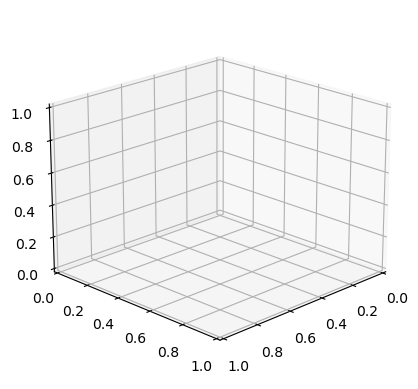

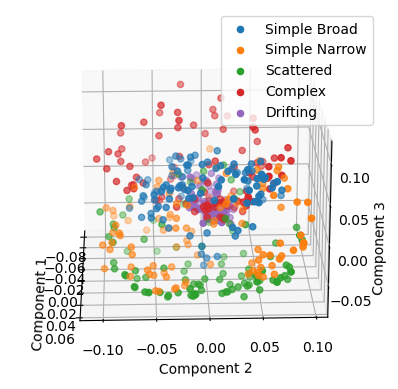

In [8]:
from matplotlib.animation import FuncAnimation

# Separate the transformed data back into classes
ica_per_directory = []
for i in range(len(directories)):
    num_samples = data[i].shape[0]
    start_idx = sum(len(data[j]) for j in range(i))
    end_idx = start_idx + num_samples
    ica_per_directory.append(transformed_fit[start_idx:end_idx, :])

# Create a 3D scatter plot for each class
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Customize the view angle
ax.view_init(elev=20, azim=45)  # Adjust the elevation and azimuth angles

labels = [
    "Simple Broad",
    "Simple Narrow",
    "Scattered",
    "Complex",
    "Drifting"
]


# Create a 3D scatter plot
def update_angle(frame):
    ax.cla()
    ax.view_init(elev=20, azim=frame)
    for i, label in enumerate(directories):
        ax.scatter(
            ica_per_directory[i][:, 0], ica_per_directory[i][:, 1], ica_per_directory[i][:, 2],
            label=labels[i]
        )
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    ax.legend()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Initialize FuncAnimation
ani = FuncAnimation(fig, update_angle, frames=np.arange(0, 360, 2), repeat=True)

# Save the animation as a GIF
ani.save('ica_animation.gif', writer='imagemagick', fps=15)

plt.show()
